In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('EastWestAirlines-2.csv')
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df2=df.drop(['ID'],axis=1)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
#normalization using standard scaler
df2n=StandardScaler().fit_transform(df2)
df2n

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# **Model 1**

In [6]:
#DBScan Clustering
dbs=DBSCAN(eps=1,min_samples=4)
dbs.fit(df2n)

DBSCAN(eps=1, min_samples=4)

In [7]:
dbs.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [8]:
#adding clusters to df
df2['Clusters']=dbs.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [9]:
df2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,184694.319471,977.113422,2.763705,1.058601,1.092628,40964.655955,22.765595,2248.875236,6.516068,4754.215501,0.706994
1,0,53978.079794,5.088374,1.658945,1.000000,1.000000,9064.591163,8.487773,138.320463,0.434148,3802.836122,0.000000
2,1,62092.632969,9.785974,2.591985,1.000000,1.000000,22952.648452,12.862477,288.490893,0.913479,4511.039162,1.000000
3,2,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
4,3,202750.000000,0.000000,4.000000,1.000000,1.000000,43155.666667,20.333333,2456.666667,4.666667,4447.333333,0.000000
5,4,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000
6,5,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
7,6,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000
8,7,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000


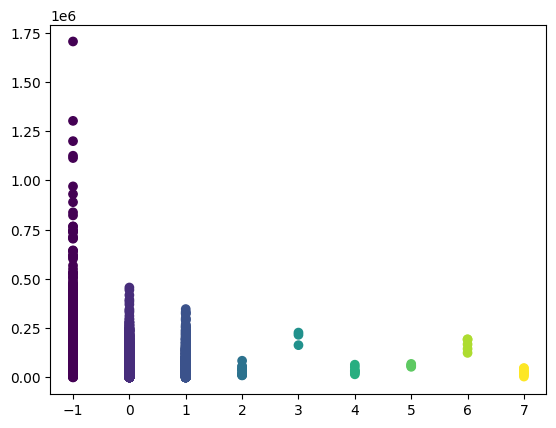

In [10]:
#plotting clusters
plt.scatter(df2['Clusters'],df2['Balance'],c=dbs.labels_)

**Model has formed 7 clusters.**

# **Model 2**

In [12]:
dbs2=DBSCAN()
dbs2.fit(df2n)

DBSCAN()

In [13]:
dbs2.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [14]:
#adding clusters to df
df2['Clusters2']=dbs2.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters,Clusters2
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [16]:
df2.groupby('Clusters2').agg(['mean']).reset_index()

,Clusters2,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,134500.365888,407.865534,2.685775,1.036801,1.034678,31603.530078,17.836518,1193.485492,3.496108,4690.736023,0.590234,0.060863
1,0,28053.443909,0.000000,1.000000,1.000000,1.000000,1946.549897,4.842395,57.693737,0.217481,3482.193393,0.000000,0.000000
2,1,29113.324627,0.000000,1.000000,1.000000,1.000000,3672.082090,4.929104,146.432836,0.470149,4031.078358,1.000000,1.000000
3,2,53130.400000,0.000000,2.000000,1.000000,1.000000,11096.400000,21.600000,50.000000,0.200000,6981.000000,0.000000,0.000000
4,3,50411.552632,0.000000,4.000000,1.000000,1.000000,37148.166667,15.342105,60.666667,0.210526,4715.043860,1.000000,1.000000
5,4,101333.108108,0.000000,4.000000,1.000000,1.000000,36288.072072,15.648649,20.720721,0.063063,4702.090090,0.000000,0.000000
6,5,75997.736170,0.000000,3.000000,1.000000,1.000000,17846.829787,14.663830,37.425532,0.131915,4040.851064,0.000000,0.000000
7,6,41971.895954,0.000000,3.000000,1.000000,1.000000,18654.855491,15.393064,42.196532,0.173410,4425.248555,1.000000,1.000000
8,7,138516.800000,0.000000,2.000000,1.000000,1.000000,8307.800000,11.600000,0.000000,0.000000,7823.200000,0.000000,0.000000


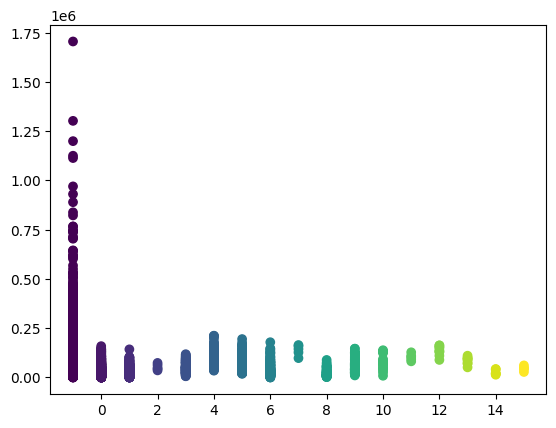

In [17]:
#plotting clusters
plt.scatter(df2['Clusters2'],df2['Balance'],c=dbs2.labels_)

**Model has formed 15 clusters.**

# **Models with fit predict method**

**Model 1**

In [61]:
db=DBSCAN()
db.fit_predict(df2n)

array([ 0,  0,  0, ..., -1,  0,  0])

In [62]:
#silhouette score, it should be near to 1
from sklearn.metrics import silhouette_score as sil

sil(df2n,db.fit_predict(df2n))

-0.07834757831741163

**Model 2**

In [63]:
db1=DBSCAN(eps=3,min_samples=5)
db1.fit_predict(df2n)

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
sil(df2n,db1.fit_predict(df2n))

0.5420774278401335

**Model 3**

In [65]:
db2=DBSCAN(eps=7,min_samples=5)
db2.fit_predict(df2n)

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
sil(df2n,db2.fit_predict(df2n))

0.8562820070415407

# **Here the 3rd Model is the best among the 3**